In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings(action="ignore")

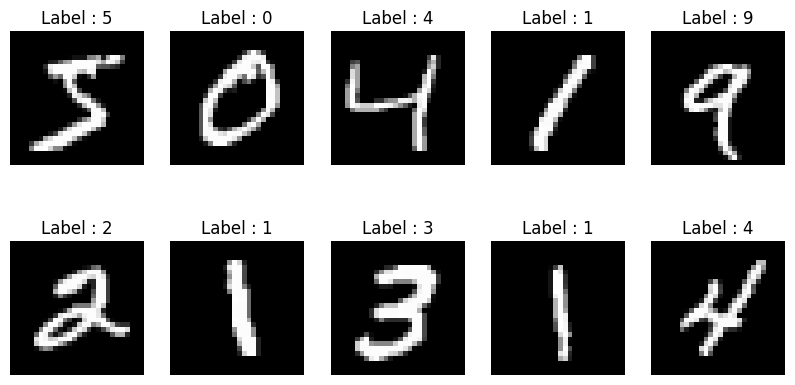

In [3]:
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0, x_test/255.0

plt.figure(figsize= (10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label : {y_train[i]}")
    plt.axis('off')

plt.show()

In [5]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
history=model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8605 - loss: 0.4799 - val_accuracy: 0.9595 - val_loss: 0.1393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9532 - loss: 0.1589 - val_accuracy: 0.9694 - val_loss: 0.1019
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9656 - loss: 0.1132 - val_accuracy: 0.9727 - val_loss: 0.0894
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9737 - loss: 0.0881 - val_accuracy: 0.9767 - val_loss: 0.0767
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9781 - loss: 0.0716 - val_accuracy: 0.9781 - val_loss: 0.0739
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9791 - loss: 0.0670 - val_accuracy: 0.9788 - val_loss: 0.0710
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9826 - loss: 0.0547 - val_accuracy: 0.9780 - val_loss: 0.0717
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9833 - loss: 0.0

In [7]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0786

Test Accuracy: 0.9794


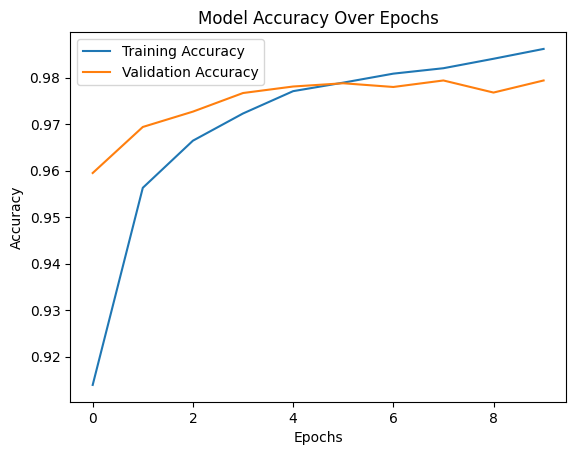

In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy Over Epochs')
plt.show()

In [9]:
y_pred= np.argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [10]:
sample_image= x_test[0]

In [11]:
sample_image= sample_image.reshape(1,28,28)
prediction= model.predict(sample_image)
predicted_label= np.argmax(prediction)

print("Predicted Label:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Label: 7


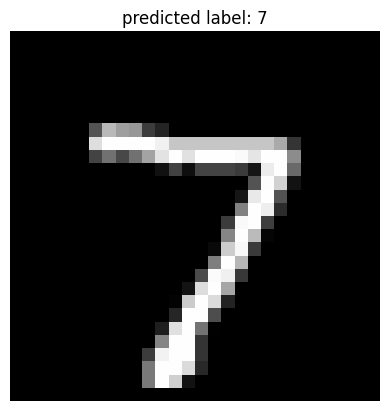

In [12]:
plt.imshow(x_test[0], cmap='grey')
plt.title(f"predicted label: {predicted_label}")
plt.axis('off')
plt.show()